In [1]:
from sympy import *
import math
import numpy as np
from pylab import *
import matplotlib.pyplot as plt 

$Input$: \\
 $y' = 3*y/x$ \\
  $y(1) = 3$, $1$ $\le$ $x$ $\le$ $3$ \\
   $h = 0.2$ \\
   $S =3$

In [2]:
def F(u,v):
    return -3*v
#def G(u):
   # return 3*u**3
x0 = 1
y0 = 3
X = 3
h = 0.2
S = 6

# Hàm tính giai thừa của một số 

In [3]:
def Giaithua(n):
  if n==0:
    return 1
  return n*Giaithua(n-1)

$y_{i} 
=y_{i-1} +h( a_0y_{i-1}^{'} + a_1 \bigtriangledown y_{i-1}^{'} + a_2 \bigtriangledown ^{2}  y_{i-1}^{'} + ... + a_{s-1} \bigtriangledown ^{s-1} y_{i-1}^{'})$ \\
$a_i = \frac{1}{i!}\int\limits_{0}^{1}t(t+1)...(t+i-1) dt$ \\
$Input: x_0$ \\
$Output: a_{x_0}$

In [4]:
def Tinhtp(S):
  a = np.zeros(S,dtype= float)
  b = np.zeros(S,dtype= float)
  a[0] = 0
  a[1] = 1
  kq = 0
  for x in range(0,S):
   if(x > 1):
    for j in range(x,0,-1):
       a[j] = a[j-1] + a[j]*(x-1)
    a[0] = 0
   for i in range(x+1):
    kq = kq + a[i]/(i+1)
   kq = kq/Giaithua(x)
   if(x == 0):
     b[x] = 1
   else:
     b[x] = kq
   kq = 0
  return b
print(Tinhtp(S))

[1.         0.5        0.41666667 0.375      0.34861111 0.32986111]


Áp dụng công thức sai phân: $\bigtriangledown y_{i-1}^{'} = y_{i-1}^{'} - y_{i-2}^{'} , \bigtriangledown^2y_{i-1} = \bigtriangledown y_{i-1}^{'} - \bigtriangledown y_{i-2}^{'}, ...$ \\
Khi đó ta có: \\
$y_{i} = y_{i} 
=y_{i-1} +h( a_0y_{i-1}^{'} + a_1 \bigtriangledown y_{i-1}^{'} + a_2 \bigtriangledown ^{2}  y_{i-1}^{'} + ... + a_{s-1} \bigtriangledown ^{s-1} y_{i-1}^{'}) \\
= y_{i-1} + h(b_0*y_{i-1}^{'} + b_1*y_{i-2}^{'} +...+ b_{s-1}*y_{i-s}^{'})$ \\
Với:
$\begin{bmatrix}
b_0 & b_1&    b_2&...&b_{s-1} 
\end{bmatrix}
= \begin{bmatrix} a_0 & a_1&a_2&...&a_{s-1}\end{bmatrix}*\begin{bmatrix} 1&0&0&...&0 \\1& -1&0&...&0\\1&-2&1&...&0\\.&.&.&.&.
\end{bmatrix}$ \\
Input: S \\
Output: ma trận hệ số của sai phân các cấp



In [5]:
def pascal(n):
  pas = np.zeros((n,n), dtype= float)
  for i in range(n):
    pas[i][0] = 1
    for j in range(1,i+1):
      pas[i][j]=pas[i-1][j-1]*(-1)+pas[i-1][j]
  return pas

# in ra mảng pas
print(pascal(S))

[[  1.   0.   0.   0.   0.   0.]
 [  1.  -1.   0.   0.   0.   0.]
 [  1.  -2.   1.   0.   0.   0.]
 [  1.  -3.   3.  -1.   0.   0.]
 [  1.  -4.   6.  -4.   1.   0.]
 [  1.  -5.  10. -10.   5.  -1.]]


In [6]:
def PTVPAB(x0,y0,X,h,S):
  n = int((X-x0)/h)
  x = np.zeros(n+1, dtype= float)
  y = np.zeros(n+1, dtype=float)
  a = np.zeros(100, dtype= float)
  b = np.zeros((S), dtype= float)
  pas = np.zeros((S,S), dtype= float)
  b1 = np.zeros(n+1, dtype= float)
  #Khởi tạo x_i
  #n = int((X-x0)/h)
  y[0] = y0
  for i in range(n+1):
    x[i] = x0 + i*h
  
  #Tính mảng hệ số b
  #for i in range(S):
  a = Tinhtp(S)
  pas = pascal(S)
  for i in range(S):
    b[i] = 0
    for j in range(S):
      b[i]=b[i]+a[j]*pas[j][i]
  print("Ma trận hệ số b là : \n",b)

  #Tao s gia tri khoi dau
  for i in range(1,S):
    K1 = h*F(x[i-1], y[i-1])
    K2 = h*F(x[i-1] + h/2, y[i-1] + K1/2)
    K3 = h*F(x[i-1] + h/2, y[i-1] + K2/2)
    K4 = h*F(x[i-1] + h, y[i-1] + K3)
    y[i] = y[i-1] + (1/6)*(K1 + 2*K2 + 2*K3 + K4)
    K1 = 0
    K2 = 0
    K3 = 0
    K4 = 0

  for i in range(S,n+1):
    T = 0
    for j in range(S):
      T = T + (h*b[j] * F(x[i-j-1],y[i-j-1]))
    y[i] = y[i-1] + T
    
  print(" \n   x                  y              g(x)            ss")
  
  for i in range(n+1):
    #b1[i] = math.fabs(G(x[i]) - y[i])
    print("%-7.6f   %-7.6f  \n" %(x[i],y[i]))
  
  plt.plot(x,y,'r')
  plt.show()
  
  

Ma trận hệ số b là : 
 [ 2.97013889 -5.50208333  6.93194444 -5.06805556  1.99791667 -0.32986111]
 
   x                  y              g(x)            ss
1.000000   3.000000  

1.200000   1.648200  

1.400000   0.905521  

1.600000   0.497493  

1.800000   0.273323  

2.000000   0.150164  

2.200000   0.087218  

2.400000   0.044228  

2.600000   0.042760  

2.800000   -0.022751  

3.000000   0.114307  



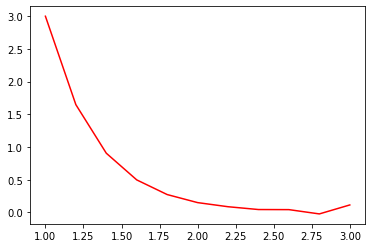

In [7]:
PTVPAB(x0, y0, X, h, S)